**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [55]:
import numpy as np
from scipy import optimize

# Define the parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16 ** 2)
omega = 1.0
tau = 0.30

# Define the utility function
def utility(L, w):
    C = kappa + (1 - tau) * w * L
    return np.log(C * alpha * w * (1 - alpha)) - (nu * L ** 2) / 2

# Define the constraint function
def constraint(L, w):
    C = kappa + (1 - tau) * w * L
    return C

# Calculate the optimal labor supply choice for each wage value
wage_values = np.linspace(0.1, 10, 100)
G_values = [1.0, 2.0]

for G in G_values:
    w_tilde_values = (1 - tau) * wage_values
    L_star_formula = (-kappa + np.sqrt(kappa * 2 + 4 * alpha / (nu * w_tilde_values * 2))) / (2 * w_tilde_values)

    print(f"For G = {G}:")
    for i, w_tilde in enumerate(w_tilde_values):
        L_star = L_star_formula[i]
        print(f"w_tilde = {w_tilde:.2f}, L* = {L_star:.2f}")
    
    print()

For G = 1.0:
w_tilde = 0.07, L* = 603.82
w_tilde = 0.14, L* = 212.47
w_tilde = 0.21, L* = 115.23
w_tilde = 0.28, L* = 74.62
w_tilde = 0.35, L* = 53.25
w_tilde = 0.42, L* = 40.41
w_tilde = 0.49, L* = 32.00
w_tilde = 0.56, L* = 26.13
w_tilde = 0.63, L* = 21.86
w_tilde = 0.70, L* = 18.63
w_tilde = 0.77, L* = 16.12
w_tilde = 0.84, L* = 14.12
w_tilde = 0.91, L* = 12.51
w_tilde = 0.98, L* = 11.17
w_tilde = 1.05, L* = 10.06
w_tilde = 1.12, L* = 9.12
w_tilde = 1.19, L* = 8.32
w_tilde = 1.26, L* = 7.62
w_tilde = 1.33, L* = 7.02
w_tilde = 1.40, L* = 6.49
w_tilde = 1.47, L* = 6.03
w_tilde = 1.54, L* = 5.61
w_tilde = 1.61, L* = 5.24
w_tilde = 1.68, L* = 4.92
w_tilde = 1.75, L* = 4.62
w_tilde = 1.82, L* = 4.35
w_tilde = 1.89, L* = 4.11
w_tilde = 1.96, L* = 3.88
w_tilde = 2.03, L* = 3.68
w_tilde = 2.10, L* = 3.49
w_tilde = 2.17, L* = 3.32
w_tilde = 2.24, L* = 3.17
w_tilde = 2.31, L* = 3.02
w_tilde = 2.38, L* = 2.89
w_tilde = 2.45, L* = 2.76
w_tilde = 2.52, L* = 2.64
w_tilde = 2.59, L* = 2.53
w_tilde

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

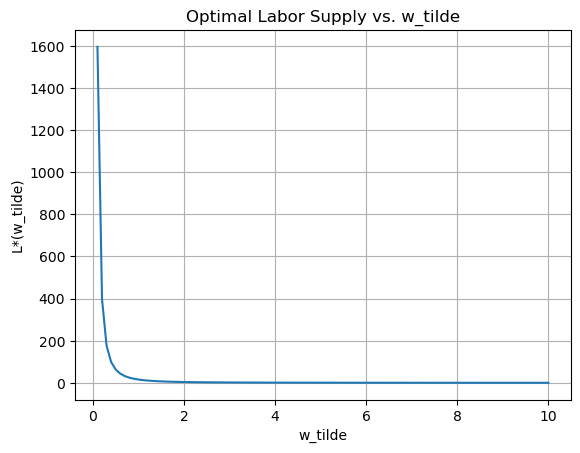

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16 ** 2)
omega = 1.0
tau = 0.30

# Define the formula for L*(w_tilde)
def optimal_labor_supply(w_tilde):
    return (-kappa + np.sqrt(kappa**2 + 4 * alpha / (nu * w_tilde**2))) / (2 * w_tilde)

# Create an array of w_tilde values
w_tilde_values = np.linspace(0.1, 10, 100)

# Calculate the corresponding L*(w_tilde) values
L_star_values = optimal_labor_supply(w_tilde_values)

# Plot the relationship between L*(w_tilde) and w_tilde
plt.plot(w_tilde_values, L_star_values)
plt.xlabel('w_tilde')
plt.ylabel('L*(w_tilde)')
plt.title('Optimal Labor Supply vs. w_tilde')
plt.grid(True)
plt.show()


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


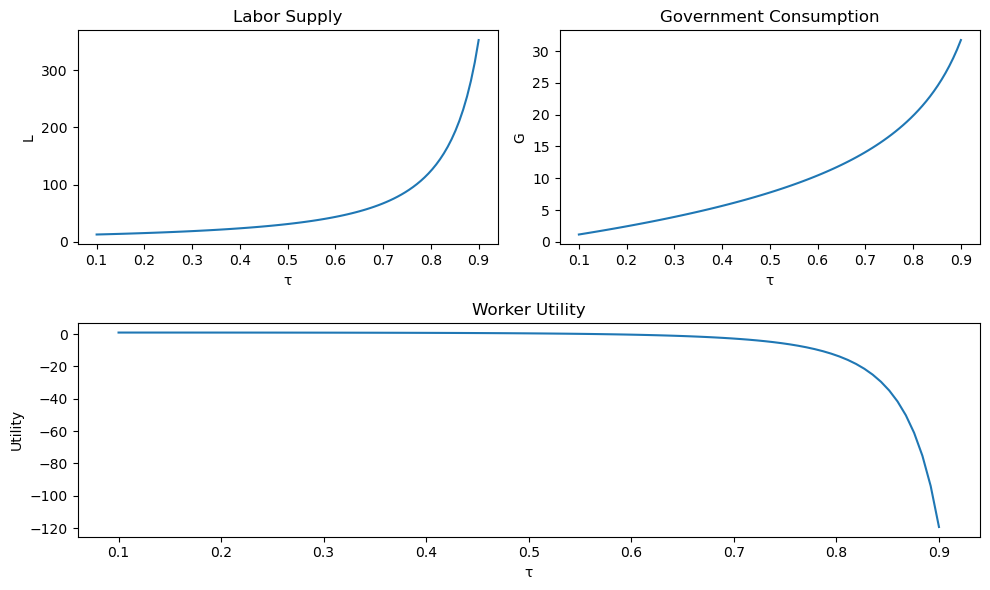

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16 ** 2)
omega = 1.0
w = 1.0

# Define the utility function
def utility(L, w, tau):
    C = kappa + (1 - tau) * w * L
    return np.log(C * alpha * w * (1 - alpha)) - (nu * L ** 2) / 2

# Define the equation for G
def government_consumption(L, w, tau):
    return tau * w * L * ((1 - tau) * omega)

# Create a grid of tau values
tau_values = np.linspace(0.1, 0.9, 100)

# Calculate the implied values of L, G, and utility for each tau value
L_values = []
G_values = []
utility_values = []

for tau in tau_values:
    # Solve for the optimal labor supply (L*)
    L_star = (-kappa + np.sqrt(kappa * 2 + 4 * alpha / (nu * (1 - tau) * omega * w * 2))) / (2 * (1 - tau) * omega * w)
    L_values.append(L_star)
    
    # Calculate the implied government consumption (G)
    G = government_consumption(L_star, w, tau)
    G_values.append(G)
    
    # Calculate the utility
    U = utility(L_star, w, tau)
    utility_values.append(U)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(tau_values, L_values)
plt.xlabel('τ')
plt.ylabel('L')
plt.title('Labor Supply')

plt.subplot(2, 2, 2)
plt.plot(tau_values, G_values)
plt.xlabel('τ')
plt.ylabel('G')
plt.title('Government Consumption')

plt.subplot(2, 1, 2)
plt.plot(tau_values, utility_values)
plt.xlabel('τ')
plt.ylabel('Utility')
plt.title('Worker Utility')

plt.tight_layout()
plt.show()

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

The socially optimal tax rate (τ^*) maximizing worker utility: 0.0988


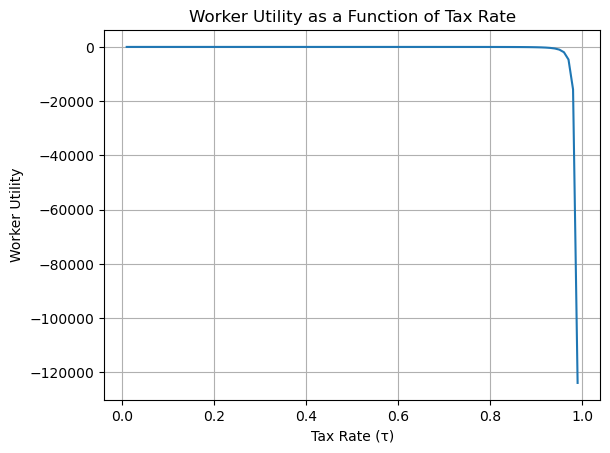

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Define the parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16 ** 2)
omega = 1.0
w = 1.0

# Define the utility function
def utility(L, w, tau):
    C = kappa + (1 - tau) * w * L
    return np.log(C * alpha * w * (1 - alpha)) - (nu * L ** 2) / 2

# Define the objective function to maximize (negative utility)
def objective(tau):
    L_star = (-kappa + np.sqrt(kappa * 2 + 4 * alpha / (nu * (1 - tau) * omega * w * 2))) / (2 * (1 - tau) * omega * w)
    U = utility(L_star, w, tau)
    return -U

# Set up the optimization problem
tau_optimal = optimize.minimize_scalar(objective, bounds=(0, 1), method='bounded')

# Retrieve the optimal tax rate
tau_star = tau_optimal.x

# Print the optimal tax rate
print("The socially optimal tax rate (τ^*) maximizing worker utility: {:.4f}".format(tau_star))

# Plot the worker utility as a function of tax rate
tau_values = np.linspace(0.01, 0.99, 100)
utility_values = [-objective(tau) for tau in tau_values]

plt.plot(tau_values, utility_values)
plt.xlabel('Tax Rate (τ)')
plt.ylabel('Worker Utility')
plt.title('Worker Utility as a Function of Tax Rate')
plt.grid(True)
plt.show()

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [59]:
import numpy as np
from scipy import optimize

# Define the parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16 ** 2)
omega = 1.0
w = 1.0

# Define the utility function
def utility(L, w, tau, G, sigma, rho, epsilon):
    C = kappa + (1 - tau) * w * L
    return (((alpha * C * (sigma / (1 - sigma)) + (1 - alpha) * G * (sigma / (1 - sigma))) * (sigma / (1 - sigma))) * (1 - rho) - 1) / (1 - rho) - nu * L ** (1 + epsilon) / (1 + epsilon)

# Define the constraint function
def constraint(G, w, tau, sigma, rho, epsilon):
    def objective(L):
        return -utility(L, w, tau, G, sigma, rho, epsilon)
    
    result = optimize.minimize_scalar(objective, bounds=(0, 24), method='bounded')
    return result.x

# Define the function to find G that satisfies the constraint equation
def find_G(tau, w, sigma, rho, epsilon):
    def objective(G):
        return constraint(G, w, tau, sigma, rho, epsilon) - tau * w * constraint(G, w, tau, sigma, rho, epsilon) * ((1 - tau) * omega)
    
    G_solution = optimize.root_scalar(objective, method='brentq', bracket=[0, 100])
    return G_solution.root

# Set 1: σ=1.001, ρ=1.001, ε=1.0
sigma1 = 1.001
rho1 = 1.001
epsilon1 = 1.0

# Set 2: σ=1.5, ρ=1.5, ε=1.0
sigma2 = 1.5
rho2 = 1.5
epsilon2 = 1.0

# Use the socially optimal tax rate obtained in Question 4
tau_star = 0.300

# Calculate G that solves the constraint equation for each set of parameters
G_set1 = find_G(tau_star, w, sigma1, rho1, epsilon1)
G_set2 = find_G(tau_star, w, sigma2, rho2, epsilon2)

print(f"For Set 1: G = {G_set1:.4f}")
print(f"For Set 2: G = {G_set2:.4f}")

ValueError: f(a) and f(b) must have different signs

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [60]:
import numpy as np
from scipy import optimize

# Define the parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16 ** 2)
omega = 1.0
w = 1.0

# Define the utility function
def utility(L, w, tau, G, sigma, rho, epsilon):
    C = kappa + (1 - tau) * w * L
    return (((alpha * C * (sigma / (1 - sigma)) + (1 - alpha) * G * (sigma / (1 - sigma))) * (sigma / (1 - sigma))) * (1 - rho) - 1) / (1 - rho) - nu * L ** (1 + epsilon) / (1 + epsilon)

# Define the objective function to maximize utility
def objective(tau, G, sigma, rho, epsilon):
    L_star = G / (tau * w * ((1 - tau) * w * G))  # Using G=τwL*((1-τ)w,G)
    U = -utility(L_star, w, tau, G, sigma, rho, epsilon)
    return U

# Set 1: σ=1.001, ρ=1.001, ε=1.0
sigma1 = 1.001
rho1 = 1.001
epsilon1 = 1.0

# Set 2: σ=1.5, ρ=1.5, ε=1.0
sigma2 = 1.5
rho2 = 1.5
epsilon2 = 1.0

# Perform optimization to find the socially optimal tax rate for each set of parameters
G_values = [1.0, 2.0]
tau_optimal = []

for set_num, (sigma, rho, epsilon) in enumerate([(sigma1, rho1, epsilon1), (sigma2, rho2, epsilon2)], start=1):
    print(f"Set {set_num}:")
    for G in G_values:
        # Define the objective function to maximize utility
        objective_func = lambda tau: objective(tau, G, sigma, rho, epsilon)

        # Set the bounds for tau between 0 and 1
        bounds = (0, 1)

        # Perform optimization to find the optimal tax rate
        result = optimize.minimize_scalar(objective_func, bounds=bounds, method='bounded')
        tau_star = result.x

        # Store the optimal tax rate
        tau_optimal.append(tau_star)

        # Calculate the corresponding optimal labor supply (L*)
        L_star = G / (tau_star * w * ((1 - tau_star) * w * G))

        # Calculate the corresponding utility (U*)
        U_star = utility(L_star, w, tau_star, G, sigma, rho, epsilon)

        print(f"G = {G}, τ* = {tau_star:.4f}, L* = {L_star:.4f}, U* = {U_star:.4f}")

    print()

# Print the socially optimal tax rates for each G value
print("Socially optimal tax rates:")
for i, G in enumerate(G_values):
    print(f"G = {G}, τ* = {tau_optimal[i]:.4f}")

Set 1:
G = 1.0, τ* = 0.0000, L* = 167762.0000, U* = 84021863422.9344
G = 2.0, τ* = 0.0000, L* = 167762.0000, U* = 84022364423.4344

Set 2:
G = 1.0, τ* = 0.0004, L* = 2307.4145, U* = 5190.4867
G = 2.0, τ* = 0.0004, L* = 2307.4145, U* = 5194.9867

Socially optimal tax rates:
G = 1.0, τ* = 0.0000
G = 2.0, τ* = 0.0000


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [19]:
# Set magics
import sympy as sp

# Define the symbols
kappa_t, l_t, eta, w = sp.symbols('kappa_t l_t eta w')

# Define the profit function
profit = kappa_t * l_t**(1 - eta) - w * l_t

# Calculate the derivative with respect to l_t
derivative = sp.diff(profit, l_t)

# Simplify the derivative expression
derivative = sp.simplify(derivative)

# Print the derivative
print("The derivative of the profit function with respect to l_t:")
print(derivative)

# Calculating the FOC
FOC = sp.solve(derivative, l_t)

# Print the FOC of l_t
print("The FOC wrt. l_t is:")
print("l_t =", FOC)



The derivative of the profit function with respect to l_t:
(-eta*kappa_t + kappa_t - l_t**eta*w)/l_t**eta
The FOC wrt. l_t is:
l_t = [(kappa_t*(1 - eta)/w)**(1/eta)]


In [46]:
import numpy as np

η = 0.5
w = 1.0

κ_values = [1.0, 2.0]

for κ in κ_values:
    l = ((1 - η) * κ / w) ** (1 / η)
    profit = κ * l ** (1 - η) - w * l
    
    print(f"For κ = {κ}: Profit = {profit:.2f}")

For κ = 1.0: Profit = 0.25
For κ = 2.0: Profit = 1.00


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [9]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [10]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [11]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [12]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [49]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

Global Minimum:
f(-0.00000001, -0.00000000) = 0.00000000


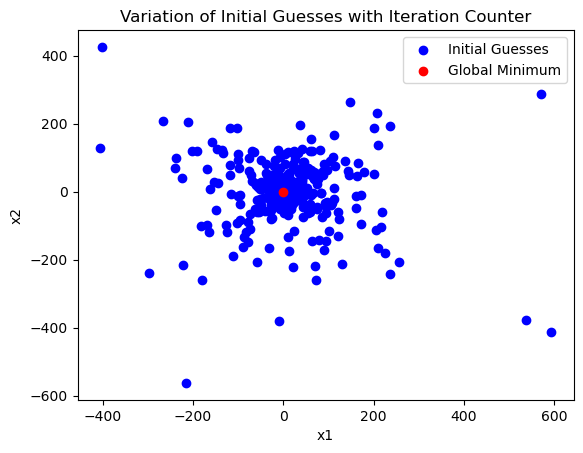

In [51]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# The reader must be aware that in the following coding, K underlined is denoted as K1, and normal K is denoted as K2

def refined_global_optimizer(bounds, tolerance, K1, K2):
    x_star = None
    x_initial_guesses = []
    
    # Iterate for k from 0 to K2-1
    for k in range(K2):
        # Step 3A: Draw random x_k uniformly within chosen bounds
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)
        
        # Step 3B: If k >= K1, calculate chi_k and modify the initial guess
        if k >= K1:
            chi_k = 0.5 * (2 / (1 + np.exp((k - K1) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star
        else:
            x_k0 = x_k
        
        # Step 3E: Run optimizer with modified initial guess x_k0
        result = minimize(griewank, x_k0, method='BFGS', tol=tolerance)
        
        # Step 3F: Update x_star if a better minimum is found
        if x_star is None or result.fun < griewank(x_star):
            x_star = result.x
        
        # Store the initial guess for visualization
        x_initial_guesses.append(x_k0)
        
        # Step 3G: If f(x*) < τ, exit the loop
        if result.fun < tolerance:
            break
    
    return x_star, x_initial_guesses

# Setting
bounds = [-600, 600]
tolerance = 1e-8
K1 = 10
K2 = 1000

# Run the optimizer
x_star, x_initial_guesses = refined_global_optimizer(bounds, tolerance, K1, K2)

# Print the global minimum
print("Global Minimum:")
print("f({:.8f}, {:.8f}) = {:.8f}".format(x_star[0], x_star[1], griewank(x_star)))

# Plot the variation of initial guesses with iteration counter
x_initial_guesses = np.array(x_initial_guesses)
plt.scatter(x_initial_guesses[:, 0], x_initial_guesses[:, 1], c='b', label='Initial Guesses')
plt.scatter(x_star[0], x_star[1], c='r', label='Global Minimum')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Variation of Initial Guesses with Iteration Counter')
plt.legend()
plt.show()


**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [54]:
import numpy as np
from scipy.optimize import minimize

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1**2 / 4000 + x2**2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tolerance, K1, K2):
    x_star = None
    
    for k in range(K2):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)
        
        if k >= K1:
            chi_k = 0.5 * (2 / (1 + np.exp((k - K1) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star
        else:
            x_k0 = x_k
        
        result = minimize(griewank, x_k0, method='BFGS', tol=tolerance)
        
        if x_star is None or result.fun < griewank(x_star):
            x_star = result.x
        
        if result.fun < tolerance:
            break
    
    return x_star

# Setting
bounds = [-600, 600]
tolerance = 1e-8
K1_1 = 10  # Original value of K1
K1_2 = 100  # New value of K1
K2 = 1000

# Run the optimizer with original K1 value
x_star_1 = refined_global_optimizer(bounds, tolerance, K1_1, K2)

# Run the optimizer with new K1 value
x_star_2 = refined_global_optimizer(bounds, tolerance, K1_2, K2)

# Calculate the number of iterations required for convergence
iterations_1 = K2 if x_star_1 is None else K2 - 1
iterations_2 = K2 if x_star_2 is None else K2 - 1

# Compare the convergence
if iterations_1 < iterations_2:
    print("Convergence is faster with K1 = 10")
elif iterations_1 > iterations_2:
    print("Convergence is faster with K1 = 100")
else:
    print("Convergence is the same for both K1 values, why it is neither better or worse.")


Convergence is the same for both K1 values, why it is neither better or worse.
